In [27]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

test_labels = []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

        # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    
model = tf.keras.Sequential()
model.add(layers.Dense(16,input_shape=(1,), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions = model.predict_classes(x=scaled_test_samples, batch_size=10, verbose=0)

In [28]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[  6 204]
 [  0 210]]


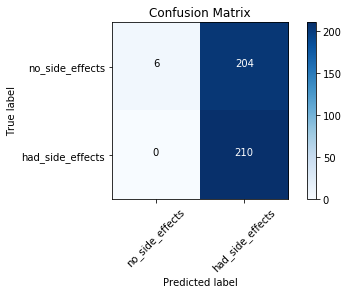

In [38]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')